In [ ]:
import pandas as pd
import datetime
import matplotlib.dates
import numpy as np
from numpy import cov
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.stats import pearsonr   
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.seasonal import seasonal_decompose

import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import Adam 
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
from keras.layers import LSTM
from sklearn.model_selection import KFold,cross_val_score,train_test_split

import plotly as py
import plotly.offline as pyoff
import plotly.graph_objs as go

#initiate plotly
pyoff.offline.init_notebook_mode(connected=True)

from sklearn.preprocessing import MinMaxScaler
import sklearn.metrics as metrics

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


ImportError: ignored

In [ ]:
df = pd.read_excel('./African Mobile Data.xlsx')

In [ ]:
cova = cov(df['Sales'],df['Profit'])
cova

array([[84903.75732849,   633.44770532],
       [  633.44770532,   975.32215279]])

In [ ]:
cova1 = pearsonr(df['Sales'],df['Profit'])
cova1 

(0.06961026193781497, 0.023689303989895067)

In [ ]:

#separate date into year,month and day
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day']=df['Date'].dt.day

#grouping the dataset
df1 =df.groupby('Date', as_index=False)['Sales'].sum()
df2 = df.groupby('Date', as_index=False)['Profit'].sum()
df3 =df.groupby('Region', as_index=False)['Sales'].sum()
df4 = df.groupby('Segment', as_index=False)['Sales'].sum()
df5 =df.groupby('Region', as_index=False)['Profit'].sum()
df6 = df.groupby('Segment', as_index=False)['Profit'].sum()

In [ ]:
df.corr()



,Sales,Profit,Year,Month,Day
Sales,1.000000,0.069610,-0.055856,0.044171,-0.051000
Profit,0.069610,1.000000,-0.012416,-0.027098,0.035420
Year,-0.055856,-0.012416,1.000000,0.007352,0.003927
Month,0.044171,-0.027098,0.007352,1.000000,0.017445
Day,-0.051000,0.035420,0.003927,0.017445,1.000000


In [ ]:
df.shape


(1056, 10)

In [ ]:
df.describe()

,Sales,Profit,Year,Month,Day
count,1056.000000,1056.000000,1056.000000,1056.000000,1056.000000
mean,497.643542,4.757538,2014.500000,5.433712,14.722538
std,291.382493,31.230148,1.118564,3.573117,8.091052
min,0.890000,-77.050000,2013.000000,1.000000,1.000000
25%,242.997500,-12.705000,2013.750000,1.750000,8.000000
50%,476.455000,2.710000,2014.500000,5.000000,15.000000
75%,750.570000,23.800000,2015.250000,8.000000,22.000000
max,999.080000,95.390000,2016.000000,12.000000,28.000000


In [ ]:
#to check the null value
df.isnull().sum()

Date       0
Country    0
City       0
Region     0
Segment    0
Sales      0
Profit     0
Year       0
Month      0
Day        0
dtype: int64

Text(0, 0.5, 'Sales')

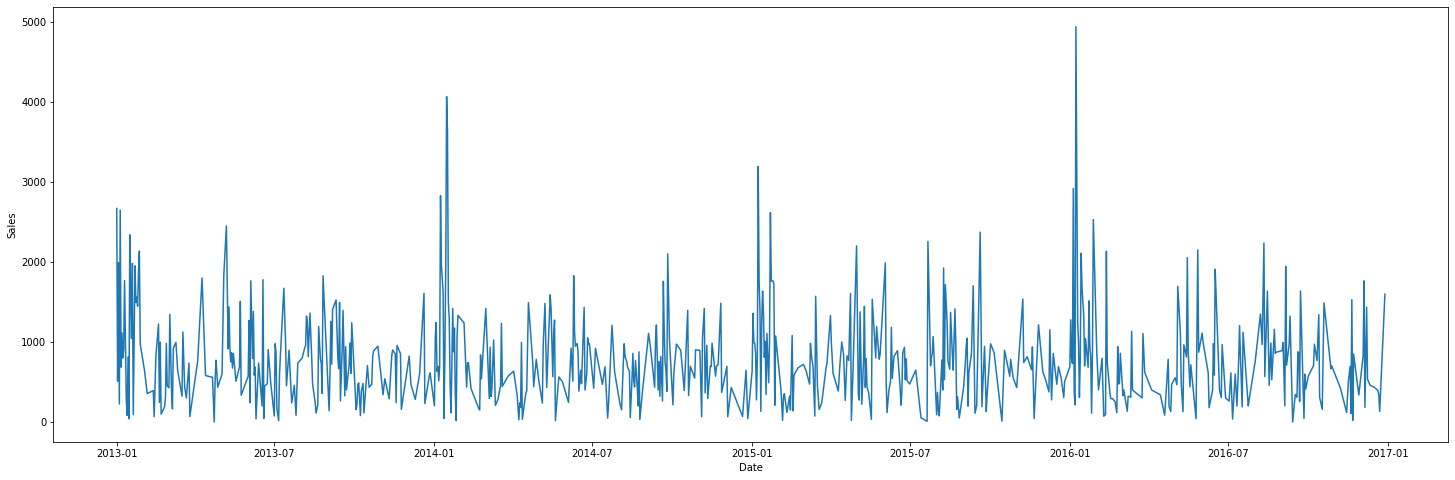

In [ ]:
plt.figure(figsize = (25,8))
plt.plot(df1['Date'],df1['Sales'])
plt.xlabel("Date")
plt.ylabel("Sales")

Text(0, 0.5, 'Profit')

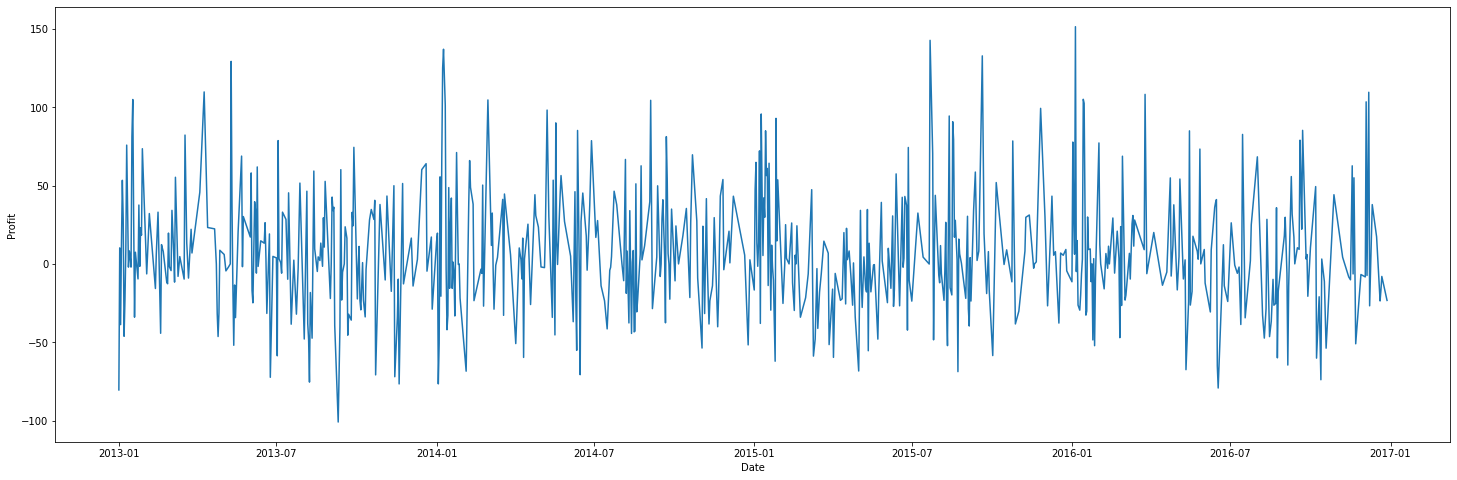

In [ ]:
plt.figure(figsize = (25,8))
plt.plot(df2['Date'],df2['Profit'])
plt.xlabel("Date")
plt.ylabel("Profit")

Text(0, 0.5, 'Sales')

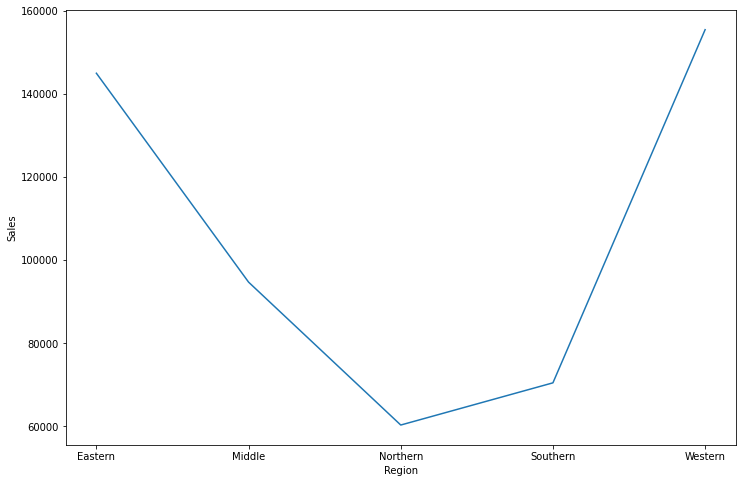

In [ ]:
plt.figure(figsize = (12,8))
plt.plot(df3['Region'],df3['Sales'])
plt.xlabel("Region")
plt.ylabel("Sales")

Text(0, 0.5, 'Sales')

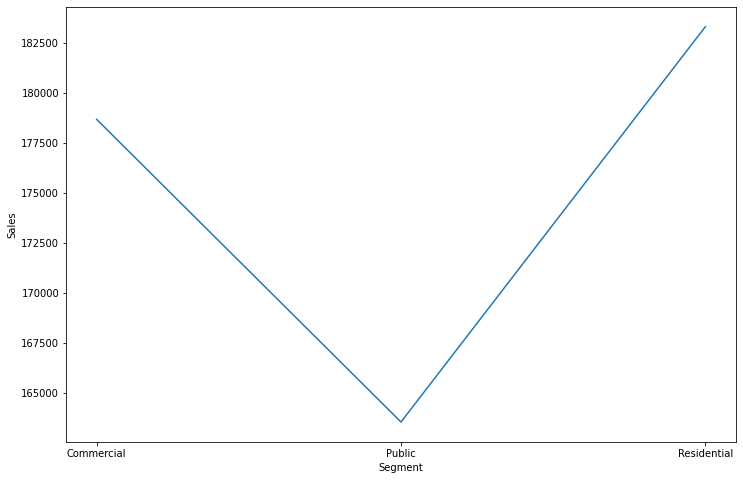

In [ ]:
plt.figure(figsize = (12,8))
plt.plot(df4['Segment'],df4['Sales'])
plt.xlabel("Segment")
plt.ylabel("Sales")

Text(0, 0.5, 'Profit')

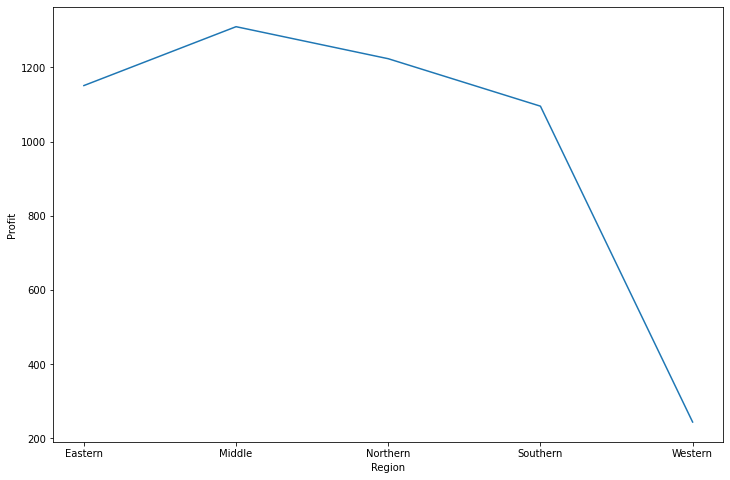

In [ ]:
plt.figure(figsize = (12,8))
plt.plot(df5['Region'],df5['Profit'])
plt.xlabel("Region")
plt.ylabel("Profit")

Text(0, 0.5, 'Profit')

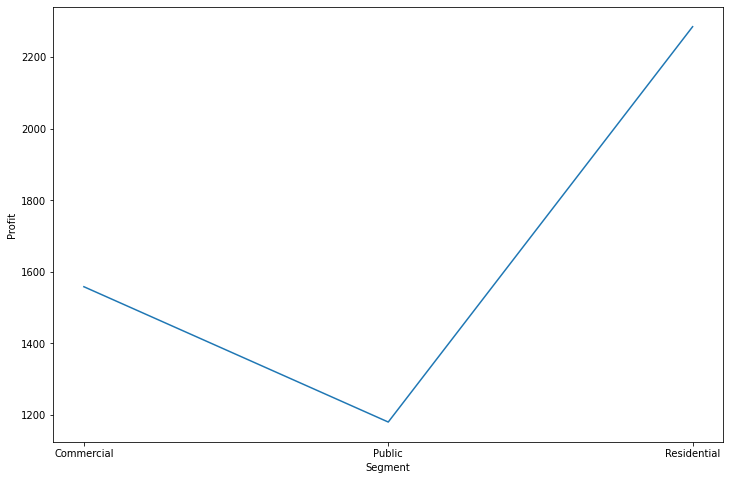

In [ ]:
plt.figure(figsize = (12,8))
plt.plot(df6['Segment'],df6['Profit'])
plt.xlabel("Segment")
plt.ylabel("Profit")

In [ ]:
d =df.groupby('Date', as_index=False)['Sales'].sum()

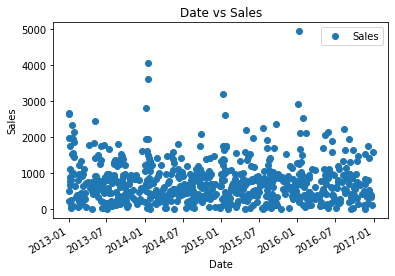

In [ ]:
d.plot(x='Date', y='Sales', style='o')  
plt.title('Date vs Sales')  
plt.xlabel('Date')  
plt.ylabel('Sales')  
plt.show()

In [ ]:
df1 = df1.set_index('Date')

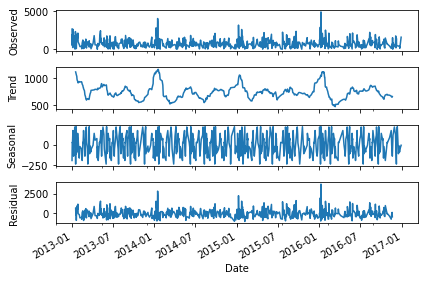

<Figure size 1800x720 with 0 Axes>

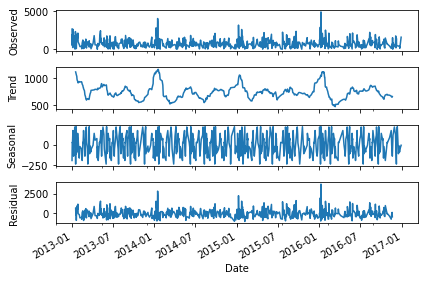

In [ ]:
plt.figure(figsize = (25,10))
result = seasonal_decompose(df1,model='additive',freq=30)
result.plot()

Text(0.5, 1.0, 'Trend')

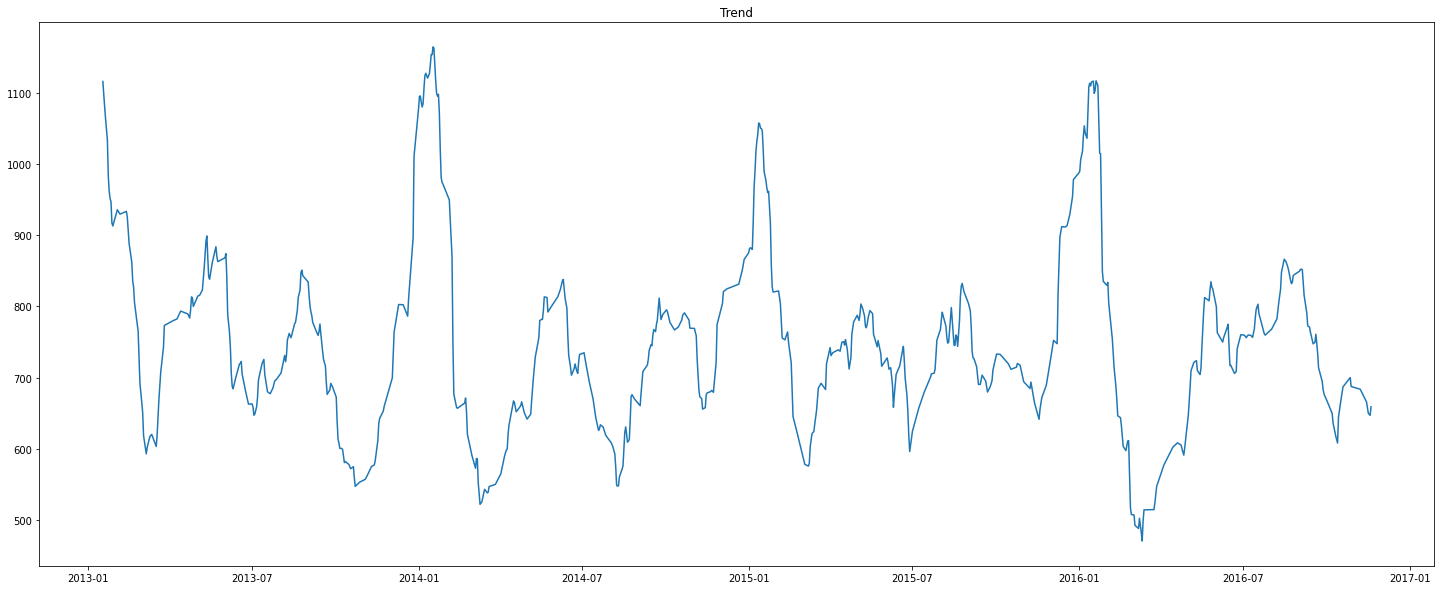

In [ ]:
plt.figure(figsize = (25,10))
plt.plot(result.trend)
plt.title('Trend')

Text(0.5, 1.0, 'Seasonal')

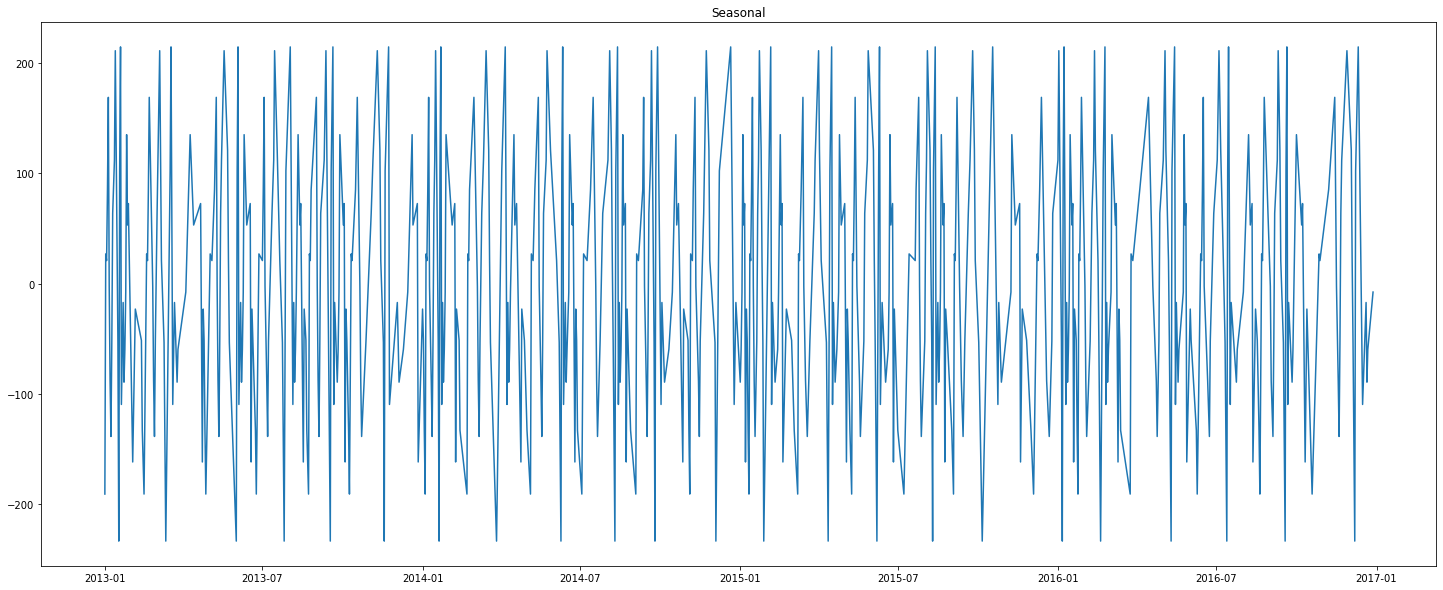

In [ ]:

plt.figure(figsize = (25,10))
plt.plot(result.seasonal)
plt.title('Seasonal')

Text(0.5, 1.0, 'Residual')

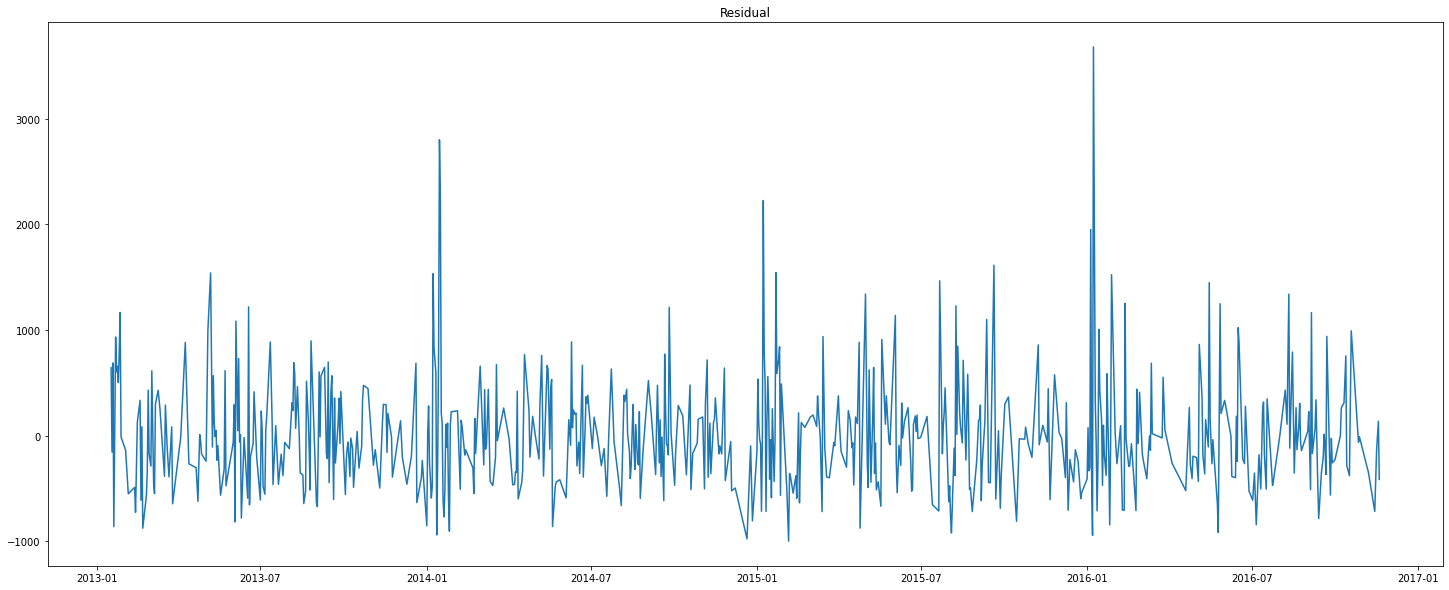

In [ ]:
plt.figure(figsize = (25,10))
plt.plot(result.resid)
plt.title('Residual')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



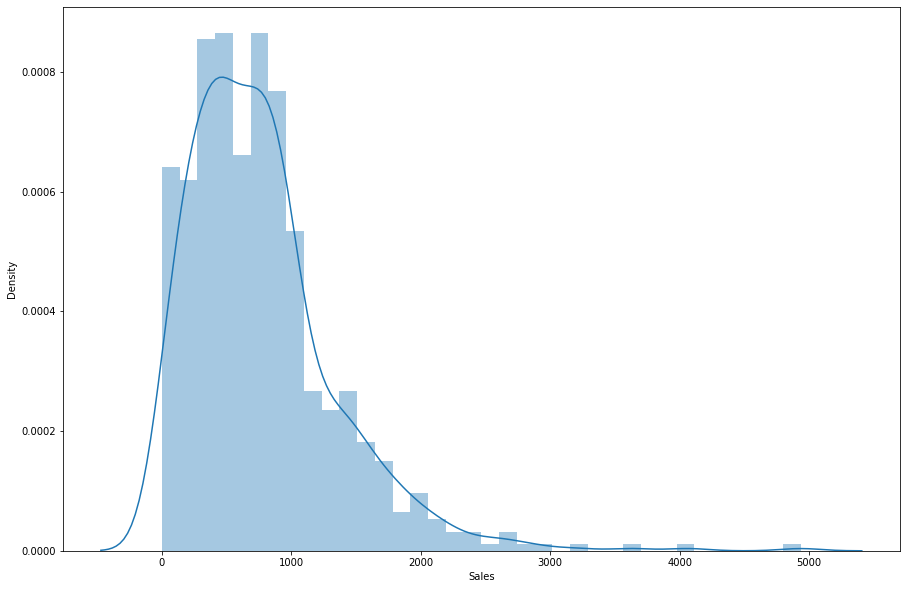

In [ ]:
plt.figure(figsize=(15,10))
plt.tight_layout()
sb.distplot(d['Sales'])

In [ ]:
#represent month in date field as its first day
df['Date'] = df['Date'].dt.year.astype('str')+'-'+ df['Date'].dt.month.astype('str')+'-01'
df['Date']=pd.to_datetime(df['Date'])

#groupby date and sum the sales
df_sales = df.groupby('Date').Sales.sum().reset_index()
df_profit = df.groupby('Date').Profit.sum().reset_index()

In [ ]:
# X = d['Date'].values.reshape(-1,1)
# y = d['Sales'].values.reshape(-1,1)
x = df_sales['Date'].values.reshape(-1,1)
y = df_sales['Sales'].values.reshape(-1,1)

In [ ]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(x, y, test_size=0.2, random_state=0)

In [ ]:
reg = LinearRegression()  
reg.fit(X_train1, y_train1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# import datetime as dt
# X_test1
# X_tests = pd.DataFrame(np.array(X_test1))
# X_tests.columns = ["Date"]
# X_tests['Date'] = pd.to_datetime(X_tests['Date'])
# X_tests['Date']=X_tests['Date'].map(dt.datetime.toordinal)
# x_tests
# y_pred1 = reg.predict(x_tests)


In [ ]:
y_pred1 = reg.predict(y_test1)
print(y_pred1)

[[57047.663565]
 [57047.663565]
 [57047.663565]
 [57047.663565]
 [57047.663565]
 [57047.663565]
 [57047.663565]
 [57047.663565]
 [57047.663565]
 [57047.663565]]


In [ ]:
di = pd.DataFrame({'Actual': y_test1.flatten(), 'Predicted': y_pred1.flatten()})
di

,Actual,Predicted
0,11582.50,57047.663565
1,14348.57,57047.663565
2,8260.35,57047.663565
3,6885.26,57047.663565
4,10867.69,57047.663565
5,9809.85,57047.663565
6,6379.50,57047.663565
7,14611.95,57047.663565
8,14197.10,57047.663565
9,5975.69,57047.663565


In [ ]:
#!pip install chart_studio

In [ ]:
# #represent month in date field as its first day
df['Date'] = df['Date'].dt.year.astype('str')+'-'+ df['Date'].dt.month.astype('str')+'-01'
df['Date']=pd.to_datetime(df['Date'])

#groupby date and sum the sales
df_sales = df.groupby('Date').Sales.sum().reset_index()
df_profit = df.groupby('Date').Profit.sum().reset_index()

In [ ]:
#plot monthly sales 
plot_data = [
             go.Scatter(
                 x = df_sales['Date'],
                 y = df_sales['Sales']
             )
]

plot_layout = go.Layout(title = 'Monthly Sales')

fig = go.Figure(data = plot_data,layout = plot_layout)
                
fig.show(renderer="colab")

#pyoff.iplot(fig)

In [ ]:
#not stationary
#create a new dataframe to model the difference
df_diff = df_sales.copy()

#add previous sales to next row
df_diff['prev_sales'] = df_diff['Sales'].shift(1)

#drop the null values and calculate the diff
df_diff = df_diff.dropna()
df_diff['diff'] = (df_diff['Sales']-df_diff['prev_sales'])



In [ ]:
plot_data = [
             go.Scatter(
                 x = df_diff['Date'],
                 y = df_diff['diff'],
             )
]

plot_layout = go.Layout(title = 'Monthly Sales Diff')

fig = go.Figure(data = plot_data,layout = plot_layout)
                
fig.show(renderer="colab")

In [ ]:
#create dataframe for transformation from time series to supervised
df_supervised = df_diff.drop(['prev_sales'],axis=1)
#adding lags
for inc in range(1,13):
    field_name = 'lag_' + str(inc)
    df_supervised[field_name] = df_supervised['diff'].shift(inc)
#drop null values
df_supervised = df_supervised.dropna().reset_index(drop=True)

In [ ]:
#Import statsmodels.formula.api
import statsmodels.formula.api as smf
# Define the regression formula
model = smf.ols(formula='diff ~ lag_1', data=df_supervised)
# Fit the regression
model_fit = model.fit()
# Extract the adjusted r-squared
regression_adj_rsq = model_fit.rsquared_adj
print(regression_adj_rsq)



0.32539524469611936


In [ ]:


# Define the regression formula
model = smf.ols(formula='diff ~ lag_1+lag_2+lag_3+lag_4+lag_5', data=df_supervised)
# Fit the regression
model_fit = model.fit()
# Extract the adjusted r-squared
regression_adj_rsq = model_fit.rsquared_adj
print(regression_adj_rsq)



0.6451887735668642


In [ ]:

# Define the regression formula
model = smf.ols(formula='diff ~ lag_1+lag_2+lag_3+lag_4+lag_5+lag_6+lag_7+lag_8+lag_9+lag_10+lag_11+lag_12', data=df_supervised)
# Fit the regression
model_fit = model.fit()
# Extract the adjusted r-squared
regression_adj_rsq = model_fit.rsquared_adj
print(regression_adj_rsq)



0.8947972796672804


In [ ]:
#import MinMaxScaler and create a new dataframe for LSTM model

df_model = df_supervised.drop(['Sales','Date'],axis=1)
# #split train and test set
train_set, test_set = df_model[0:-5].values, df_model[-12:].values
# print(train_set.shape)

In [ ]:
#apply Min Max Scaler
scaler = MinMaxScaler(feature_range=(-1, 1))
scaler = scaler.fit(train_set)
# reshape training set
train_set = train_set.reshape(train_set.shape[0], train_set.shape[1])
train_set_scaled = scaler.transform(train_set)
# reshape test set
test_set = test_set.reshape(test_set.shape[0], test_set.shape[1])
test_set_scaled = scaler.transform(test_set)

In [ ]:
X_train, y_train = train_set_scaled[:, 1:], train_set_scaled[:, 0:1]
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test, y_test = test_set_scaled[:, 1:], test_set_scaled[:, 0:1]
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])
print(X_train.shape)
print(X_test.shape)

(30, 1, 12)
(12, 1, 12)


In [ ]:
# lstm_model = Sequential()
# lstm_model.add(LSTM(4, batch_input_shape=(1, X_train.shape[1], X_train.shape[2]), stateful=True))
# lstm_model.add(Dense(1))
# lstm_model.compile(loss='mean_squared_error', optimizer='adam')
# lstm_model.fit(X_train, y_train, epochs=182, batch_size=1, verbose=1, shuffle=False, validation_data=(X_test, y_test))

In [ ]:
# history = lstm_model.history.history
# train_loss = history['loss']
# val_loss = history['val_loss']
# x_axis = list(range(len(train_loss)))
# # plt.figure(figsize=(16, 6))
# # plt.plot(x_axis, train_loss, label='train_loss')
# # plt.plot(x_axis, val_loss, label='val_loss')
# # plt.legend()

# plot_data = [
#     go.Scatter(
#         x=x_axis,
#         y=train_loss,
#         name='train_loss'
#     ),
#         go.Scatter(
#         x=x_axis,
#         y=val_loss,
#         name='val_loss'
#     )
    
# ]
# plot_layout = go.Layout(
#         title='Training and Validation loss'
#     )
# fig = go.Figure(data=plot_data, layout=plot_layout)
# fig.show(renderer="colab")

In [ ]:
from tensorflow.keras.models import load_model
lstm_model = load_model('lstm_model_final.h5')

In [ ]:
temp = []
for i in X_test:
  temp.append(lstm_model.predict(i.reshape(-1, 1, 12)).flatten()[0])
temp = np.array(temp)
temp = temp.reshape(-1, 1)
print(temp)
y_pred = np.array(temp)
y_pred = y_pred.reshape(y_pred.shape[0], 1, y_pred.shape[1])

[[ 0.47988552]
 [-0.8430522 ]
 [-0.21550703]
 [-0.15335836]
 [ 0.24957572]
 [-0.22484522]
 [-0.2100117 ]
 [ 0.40186477]
 [-0.00492237]
 [-0.3414433 ]
 [-0.07174178]
 [-0.02478246]]


In [ ]:
#reshape y_pred
y_pred = np.array(temp)
y_pred = y_pred.reshape(y_pred.shape[0], 1, y_pred.shape[1])

#rebuild test set for inverse transform
pred_test_set = []
for index in range(0,len(y_pred)):
    # print(np.concatenate([y_pred[index],X_test[index]],axis=1))
    pred_test_set.append(np.concatenate([y_pred[index],X_test[index]],axis=1))

#reshape pred_test_set
pred_test_set = np.array(pred_test_set)
pred_test_set = pred_test_set.reshape(pred_test_set.shape[0], pred_test_set.shape[2])

#inverse transform
pred_test_set_inverted = scaler.inverse_transform(pred_test_set)

In [ ]:
df_sales.rename(columns = {'Date':'date','Sales':'sales'}, inplace = True) 

In [ ]:
#create dataframe that shows the predicted sales
result_list = []
sales_dates = list(df_sales[-13:].date)
act_sales = list(df_sales[-13:].sales)
for index in range(0,len(pred_test_set_inverted)):
    result_dict = {}
    result_dict['pred_value'] = int(pred_test_set_inverted[index][0] + act_sales[index])
    result_dict['date'] = sales_dates[index+1]
    result_list.append(result_dict)
df_result = pd.DataFrame(result_list)
#for multistep prediction, replace act_sales with the predicted sales

In [ ]:
# df_test_list = []
# for index in range(36,48):
#   test_dict = {}
#   test_dict['sales'] = df_sales['sales'][index]
#   test_dict['pred_value'] = temp
#   # test_dict['pred_value'] = df_sales['pred_value'][index]
#   df_test_list.append(test_dict)
# df_test = pd.DataFrame(df_test_list)


In [ ]:
#merge with actual sales dataframe
df_sales_pred = pd.merge(df_sales,df_result,on='date',how='left')
#plot actual and predicted
plot_data = [
    go.Scatter(
        x=df_sales_pred['date'][20:],
        y=df_sales_pred['sales'][20:],
        name='actual'
    ),
        go.Scatter(
        x=df_sales_pred['date'][20:],
        y=df_sales_pred['pred_value'][20:],
        name='predicted'
    )
    
]
plot_layout = go.Layout(
        title='Sales Prediction'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
# pyoff.iplot(fig)
fig.show(renderer="colab")


In [ ]:
mae = metrics.mean_absolute_error(y_test, temp)
mse = metrics.mean_squared_error(y_test,temp)
rmse = np.sqrt(mse) # or mse**(0.5)  

r2 = metrics.r2_score(y_test,temp)

print("Results of sklearn.metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

Results of sklearn.metrics:
MAE: 0.10055975789979464
MSE: 0.019114088522327446
RMSE: 0.13825371070002948
R-Squared: 0.8680727668350531


In [ ]:
# lstm_model.save('lstm_model.h5')

In [ ]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(df_sales['sales'].dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -3.492329
p-value: 0.008186


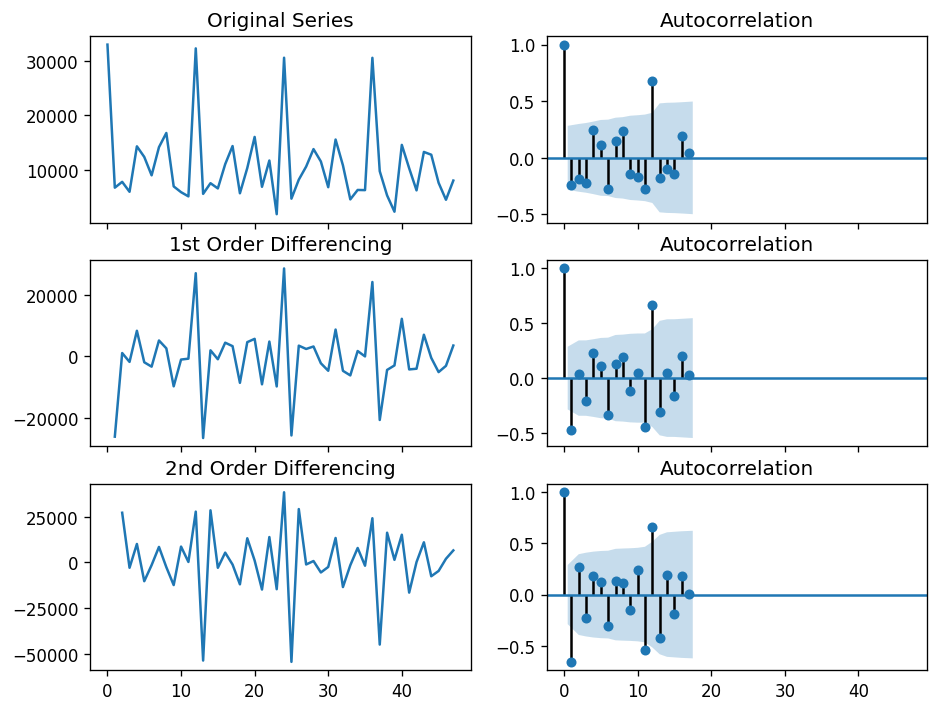

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})


# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(df_sales['sales']); axes[0, 0].set_title('Original Series')
plot_acf(df_sales['sales'], ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df_sales['sales'].diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df_sales['sales'].diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df_sales['sales'].diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df_sales['sales'].diff().diff().dropna(), ax=axes[2, 1])

plt.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning:

invalid value encountered in sqrt



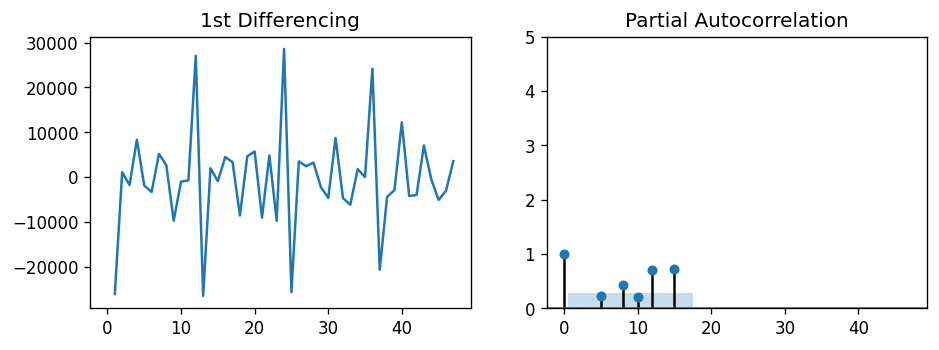

In [ ]:
# PACF plot of 1st differenced series
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df_sales['sales'].diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(df_sales['sales'].diff().dropna(), ax=axes[1])

plt.show()

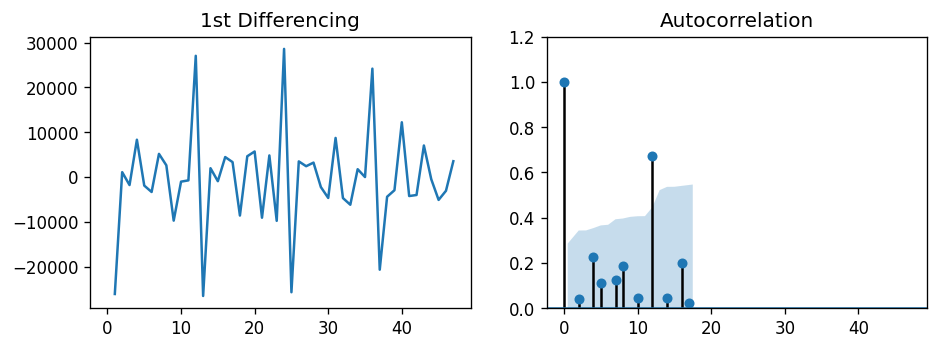

In [ ]:
fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df_sales['sales'].diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(df_sales['sales'].diff().dropna(), ax=axes[1])

plt.show()

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

# 1,1,2 ARIMA Model
model = ARIMA(df_sales['sales'], order=(1,1,2))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.sales   No. Observations:                   47
Model:                 ARIMA(1, 1, 2)   Log Likelihood                -477.177
Method:                       css-mle   S.D. of innovations           5429.492
Date:                Sun, 07 Mar 2021   AIC                            964.354
Time:                        01:52:12   BIC                            973.605
Sample:                             1   HQIC                           967.835
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -35.2966     10.990     -3.212      0.003     -56.838     -13.756
ar.L1.D.sales     0.1190      0.168      0.709      0.482      -0.210       0.448
ma.L1.D.sales    -2.0000      0.127    -

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available



In [ ]:
# 1,1,1 ARIMA Model
model = ARIMA(df_sales['sales'], order=(1,1,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.sales   No. Observations:                   47
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -484.393
Method:                       css-mle   S.D. of innovations           6904.861
Date:                Sun, 07 Mar 2021   AIC                            976.787
Time:                        01:52:12   BIC                            984.188
Sample:                             1   HQIC                           979.572
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -67.9241     57.020     -1.191      0.240    -179.681      43.833
ar.L1.D.sales    -0.2852      0.154     -1.857      0.070      -0.586       0.016
ma.L1.D.sales    -1.0000      0.055    -

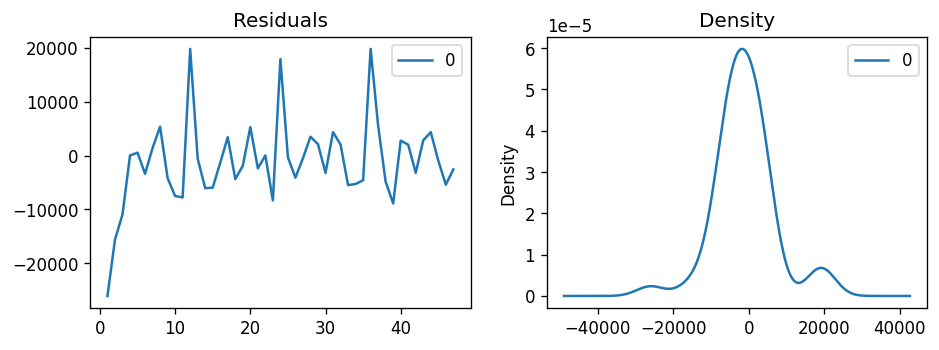

In [ ]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

In [ ]:
train = df_sales['sales'][:40]
test = df_sales['sales'][40:]

                             ARIMA Model Results                              
Dep. Variable:               D2.sales   No. Observations:                   38
Model:                 ARIMA(4, 2, 1)   Log Likelihood                -395.663
Method:                       css-mle   S.D. of innovations           7039.386
Date:                Sun, 07 Mar 2021   AIC                            805.326
Time:                        01:52:13   BIC                            816.789
Sample:                             2   HQIC                           809.405
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             11.1284     23.371      0.476      0.637     -34.677      56.934
ar.L1.D2.sales    -1.2006      0.157     -7.661      0.000      -1.508      -0.893
ar.L2.D2.sales    -1.1410      0.193

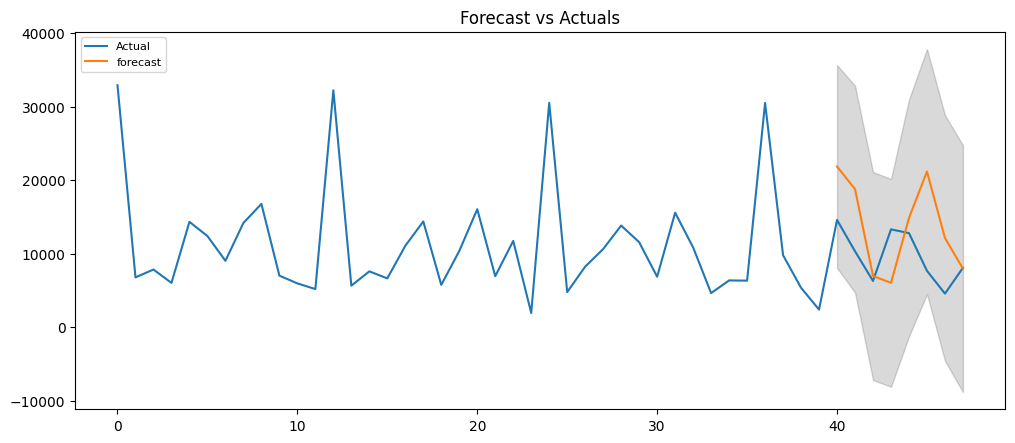

In [ ]:
# Build Model
model = ARIMA(train, order=(4, 2, 1))  
fitted = model.fit(disp=-1)  
print(fitted.summary())

# Forecast
fc, se, conf = fitted.forecast(8, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(df_sales['sales'], label='Actual')
#plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [ ]:
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})
# Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    #acf1 = acf(fc-test)[1]                      # ACF1
    r2 = metrics.r2_score(actual,forecast)
    print('mean absolute error: ', mae)
    print('root mean square error: ', rmse)
    print('mean percentage error: ', mpe)


    # return({'mape':mape, 'me':me, 'mae': mae, 
    #         'mpe': mpe, 'rmse':rmse,# 'acf1':acf1, 
    #         'corr':corr, 'minmax':minmax, 'r2':r2})

forecast_accuracy(fc, test.values)

mean absolute error:  5863.836478890892
root mean square error:  7257.847397456835
mean percentage error:  0.5534465229096875


In [ ]:
pip install pmdarima

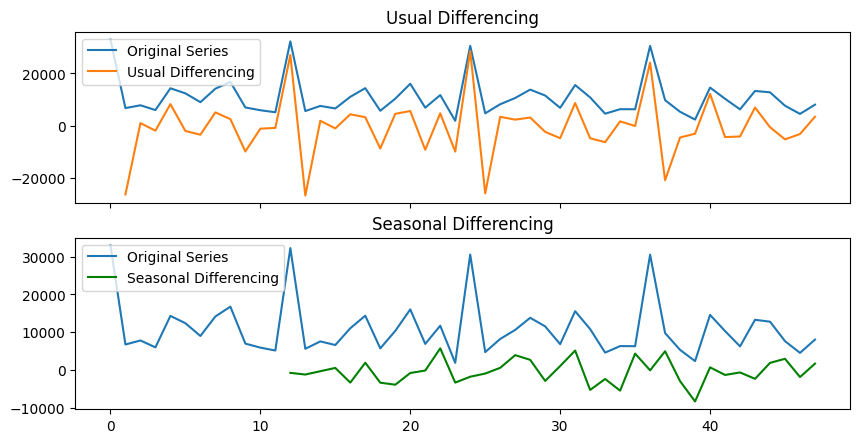

In [ ]:
# Plot
fig, axes = plt.subplots(2, 1, figsize=(10,5), dpi=100, sharex=True)

# Usual Differencing
axes[0].plot(df_sales['sales'][:], label='Original Series')
axes[0].plot(df_sales['sales'][:].diff(1), label='Usual Differencing')
axes[0].set_title('Usual Differencing')
axes[0].legend(loc='upper left', fontsize=10)


# Seasinal Dei
axes[1].plot(df_sales['sales'][:], label='Original Series')
axes[1].plot(df_sales['sales'][:].diff(12), label='Seasonal Differencing', color='green')
axes[1].set_title('Seasonal Differencing')
plt.legend(loc='upper left', fontsize=10)
plt.show()

In [ ]:
from itertools import product
p = range(0, 4, 1)
d = 1
q = range(0, 4, 1)
P = range(0, 4, 1)
D = 1
Q = range(0, 4, 1)
s = 4
parameters = product(p, q, P, Q)
parameters_list = list(parameters)
print(len(parameters_list))

256


In [ ]:
# Seasonal - fit stepwise auto-ARIMA
import pmdarima as pm
smodel = pm.auto_arima(df_sales['sales'], start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=689.938, Time=0.29 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=685.864, Time=0.01 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=687.702, Time=0.12 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=688.117, Time=0.13 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=684.324, Time=0.02 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=685.994, Time=0.08 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=685.994, Time=0.06 sec
 ARIMA(0,0,0)(1,1,1)[12] intercept   : AIC=687.984, Time=0.09 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=687.460, Time=0.03 sec
 ARIMA(0,0,1)(0,1,0)[12] intercept   : AIC=687.225, Time=0.09 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=689.521, Time=0.11 sec

Best model:  ARIMA(0,0,0)(0,1,0)[12]          
Total fit time: 1.055 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                                SARIMAX Results                                 
================================================================================
Dep. Variable:                        y   No. Observations:                   48
Model:             SARIMAX(0, 1, 0, 12)   Log Likelihood                -341.162
Date:                  Sun, 07 Mar 2021   AIC                            684.324
Time:                          01:53:30   BIC                            685.907
Sample:                               0   HQIC                           684.876
                                   - 48                                         
Covariance Type:                    opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      9.825e+06   2.37e+06      4.149      0.000    5.18e+06    1.45e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.44   Jarque-Bera (JB):                 0.05
Prob(Q):                              0.51   Prob(JB):                         0.98
Heteroskedasticity (H):               1.48   Skew:                            -0.04
Prob(H) (two-sided):                  0.51   Kurtosis:                         2.84
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
best_model = SARIMAX(df_sales['sales'], order=(0, 0, 0), seasonal_order=(0, 1, 0, 12)).fit(dis=-1)
print(best_model.summary())

                                SARIMAX Results                                 
Dep. Variable:                    sales   No. Observations:                   48
Model:             SARIMAX(0, 1, 0, 12)   Log Likelihood                -341.162
Date:                  Sun, 07 Mar 2021   AIC                            684.324
Time:                          01:53:30   BIC                            685.907
Sample:                               0   HQIC                           684.876
                                   - 48                                         
Covariance Type:                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      9.825e+06   2.37e+06      4.149      0.000    5.18e+06    1.45e+07
Ljung-Box (L1) (Q):                   0.44   Jarque-Bera (JB):                 0.05
Prob(Q):                       

In [ ]:
best_model.plot_diagnostics(figsize=(15,12));


In [ ]:
df_sales['sarima_model'] = best_model.fittedvalues
df_sales['sarima_model'][:35] = np.NaN
forecast = best_model.predict(start=df_sales.shape[0], end=df_sales.shape[0])
forecast = df_sales['sarima_model'].append(forecast)
plt.figure(figsize=(12, 6))
plt.plot(forecast,':b', label='forecast')
plt.axvspan(df_sales.index[-1], forecast.index[ -1], alpha=0.15)
plt.plot(df_sales['sales'].values, 'yellow',label = 'actual')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()
# print(df_sales['sales'], forecast)

In [ ]:
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})
# Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    r2 = metrics.r2_score(actual,forecast)

    print('mean absolute error: ', mae)
    print('root mean square error: ', rmse)
    print('mean percentage error: ', mpe)
    print('r2 error', r2)

    # return({'mape':mape, 'me':me, 'mae': mae, 
    #         'mpe': mpe, 'rmse':rmse, 'r2':r2})

forecast_accuracy(df_sales['sales'][35:], forecast[35:48])

In [ ]:
# df_test_list = []
# for index in range(36,48):
#   test_dict = {}
#   test_dict['sales'] = df_sales_pred['sales'][index]
#   test_dict['pred_value_lstm'] = df_sales_pred['pred_value'][index]
#   # test_dict['pred_value_sar'] = forecast[index]
#   df_test_list.append(test_dict)
# df_test = pd.DataFrame(df_test_list)
# print(df_test)
print(fc)

In [ ]:
f = fc.tolist()
temp = np.append(np.ones((36))*float("nan"), fc)
# print(fc)
# print(df_sales_pred['pred_value'])

# f = []
# for index in range(40,48):
#   p = {}
#   p['pre'] = fc[index]


In [ ]:
plot_data = [
    go.Scatter(
        x=df_sales_pred['date'][20:],
        y=df_sales_pred['sales'][20:],
        name='actual',
        line = dict(color = 'yellow')
        
      ),
          go.Scatter(
         x=df_sales_pred['date'][20:],
         y=df_sales_pred['pred_value'][20:],
         name='lstm',
         line = dict(color = 'blue',
         dash = 'dash')
    ),
        go.Scatter(
          x = df_sales_pred['date'][20:],
          y = forecast[20:],
          name = 'sarima',
          line = dict(color = 'black',
          dash = 'dot')
        ),
        
        go.Scatter(
          x = df_sales_pred['date'][20:],
          y = temp[20:],
          name = 'arima',
          line = dict(color = 'red',
         dash = 'dashdot')
        )
    
    
]
plot_layout = go.Layout(
        title='Sales Prediction',
        plot_bgcolor  = 'white'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
# pyoff.iplot(fig)
fig.show(renderer="colab")


In [ ]:
print(df_sales['sales'][35:])

In [ ]:
plt.plot(df_sales_pred['date'][20:],
        df_sales_pred['sales'][20:])
plt.plot(df_sales_pred['date'][20:],
         df_sales_pred['pred_value'][20:])
plt.plot(df_sales_pred['date'][20:],
        forecast[21:])
plt.plot(df_sales_pred['date'][20:],
        temp)